# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>
ad Naufal

In [1]:
import pandas as pd

df = pd.read_excel('youtube_statistics.xlsx')
print(df.head())

  trending_date                                              title  \
0    2017-11-14  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
1    2017-11-14  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...   
2    2017-11-14  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3    2017-11-14                     Eruma Saani | Tamil vs English   
4    2017-11-14  why Samantha became EMOTIONAL @ Samantha naga ...   

     channel_title  category_id publish_time  \
0  Lokdhun Punjabi            1     12:20:39   
1          HJ NEWS           25     05:43:56   
2             TFPC           24     15:48:08   
3      Eruma Saani           23     07:08:48   
4       Filmylooks           24     01:14:16   

                                                tags    views  likes  \
0  sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1  पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Overview
print("Dataset Dimensions:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Dimensions: (36791, 18)

Column Data Types:
 trending_date                     object
title                             object
channel_title                     object
category_id                        int64
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
No_tags                            int64
desc_len                           int64
len_title                          int64
publish_date              datetime64[ns]
dtype: object

Missing Values:
 trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
vie

In [13]:
print("\nDescriptive Statistics (Numerical):\n", df.describe())
print("\nUnique Values per Column:\n", df.nunique())


Descriptive Statistics (Numerical):
         category_id         views         likes      dislikes  comment_count  \
count  36791.000000  3.679100e+04  3.679100e+04  3.679100e+04   36791.000000   
mean      21.552173  1.071490e+06  2.745069e+04  1.685363e+03    2714.022043   
min        1.000000  4.024000e+03  0.000000e+00  0.000000e+00       0.000000   
25%       23.000000  1.256040e+05  8.790000e+02  1.090000e+02      83.000000   
50%       24.000000  3.078360e+05  3.126000e+03  3.310000e+02     336.000000   
75%       24.000000  8.066315e+05  1.409500e+04  1.032000e+03    1314.500000   
max       43.000000  1.254322e+08  2.912710e+06  1.545017e+06  827755.000000   
std        6.586716  3.207149e+06  9.783129e+04  1.619732e+04   14978.114328   

            No_tags      desc_len     len_title                   publish_date  
count  36791.000000  36791.000000  36791.000000                          36791  
mean      18.938463    923.079123     70.609361  2018-02-24 11:20:36.334973440 

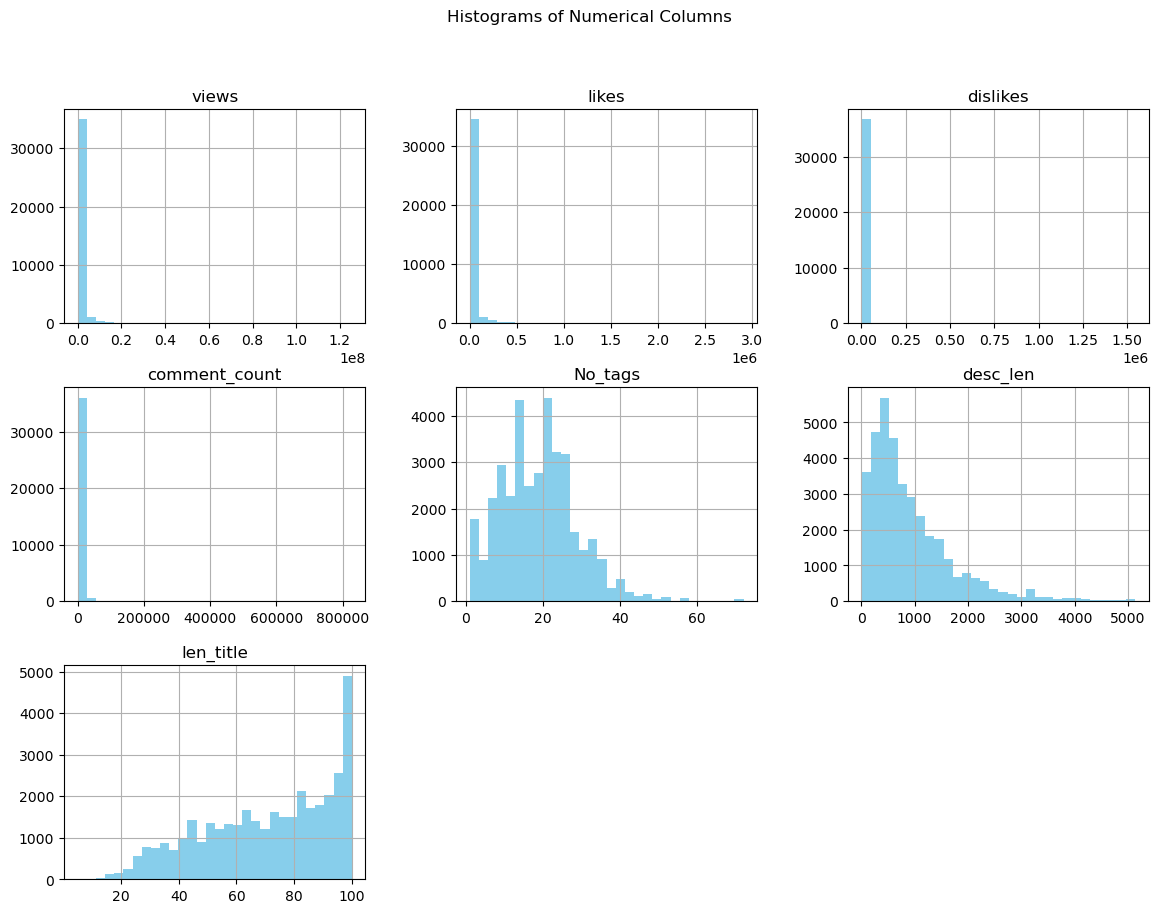

In [7]:
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
df[numerical_columns].hist(figsize=(14, 10), bins=30, color='skyblue')
plt.suptitle("Histograms of Numerical Columns")
plt.show()

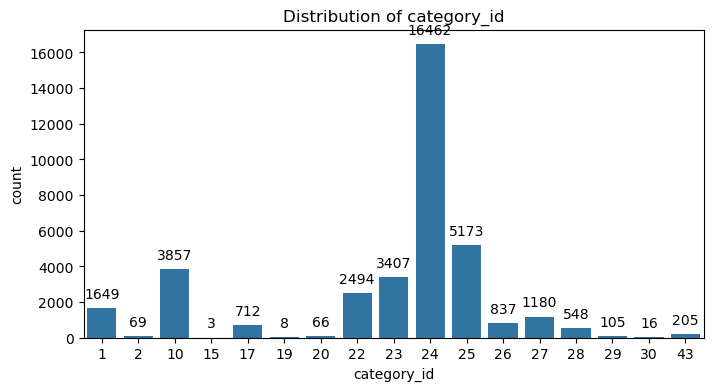

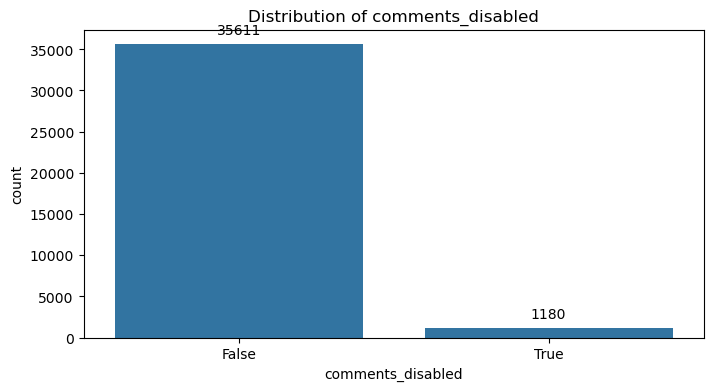

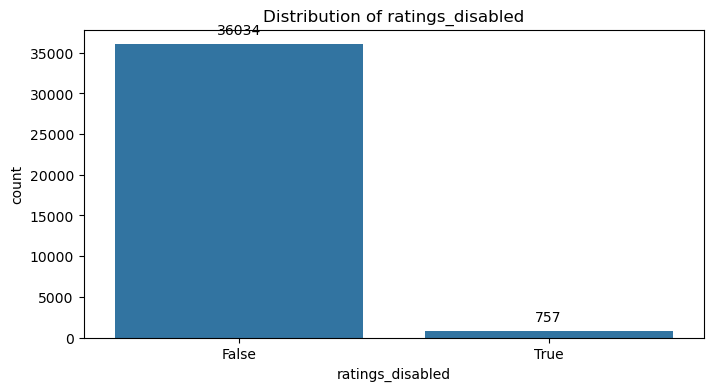

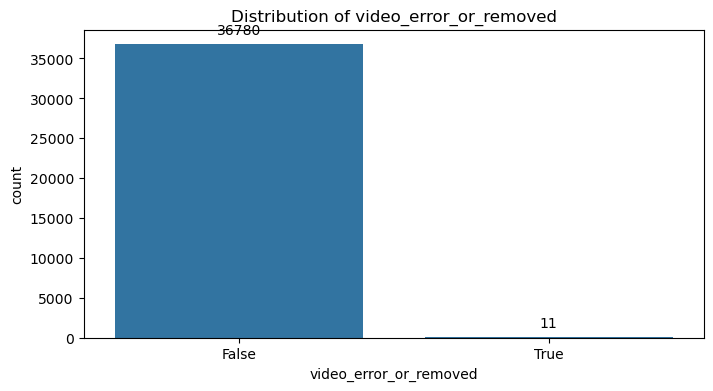

In [24]:
# 4. Distribution of Categorical Columns (Bar Plots)
categorical_columns = ['category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col)
    
    # Annotate bars with counts
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f"Distribution of {col}")
    plt.show()

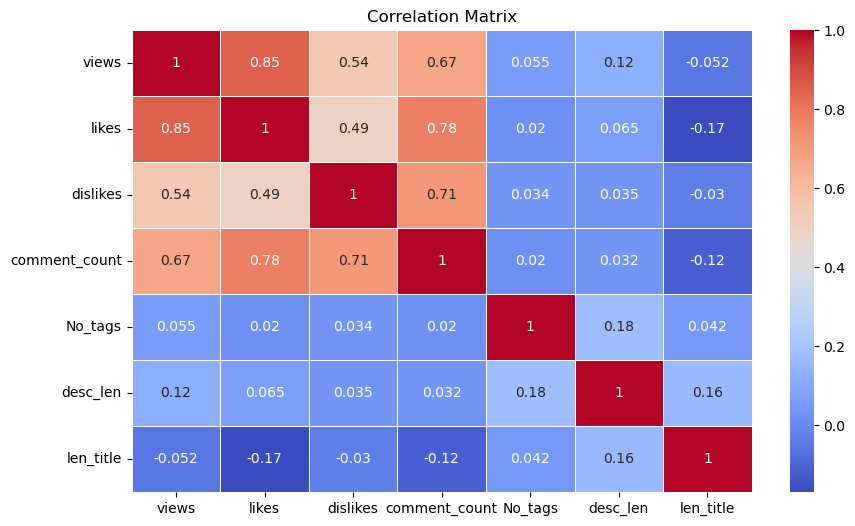

In [9]:
# 5. Correlation Matrix
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

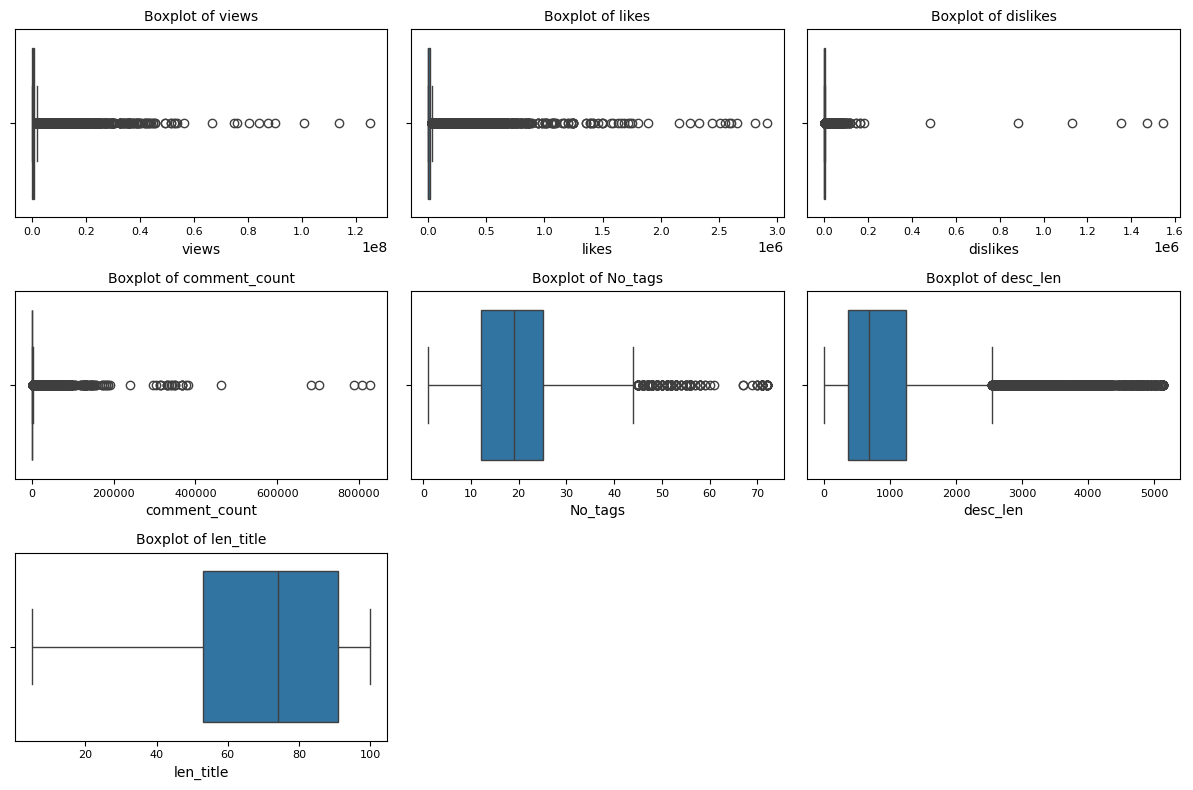

In [9]:
#6.  Create a 3x3 grid layout with more compact boxes
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and plot the boxplots in the correct subplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)

# Hide any extra empty subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to make it more compact
plt.tight_layout()
plt.show()

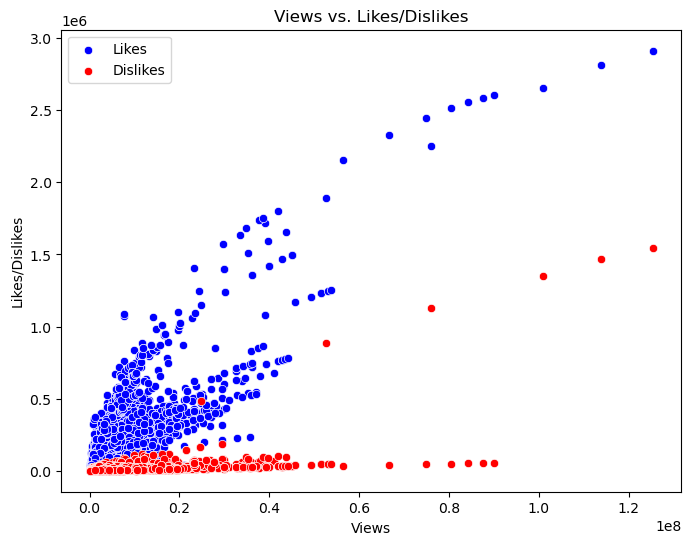

In [11]:
# 7. Views vs. Likes/Dislikes Relationship (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='views', y='likes', color='blue', label='Likes')
sns.scatterplot(data=df, x='views', y='dislikes', color='red', label='Dislikes')
plt.title("Views vs. Likes/Dislikes")
plt.xlabel("Views")
plt.ylabel("Likes/Dislikes")
plt.legend()
plt.show()

In [38]:
# 8. Top 10 Most Viewed Videos
top_10_views = df.nlargest(10, 'views')[['title', 'views', 'likes', 'dislikes', 'comment_count']]
print("\nTop 10 Most Viewed Videos:\n", top_10_views)


Top 10 Most Viewed Videos:
                                                   title      views    likes  \
5300  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  125432237  2912710   
5019  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  113876217  2811216   
4838  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  100911567  2656672   
4383  Marvel Studios' Avengers: Infinity War Officia...   89930713  2606663   
4148  Marvel Studios' Avengers: Infinity War Officia...   87449453  2584674   
3927  Marvel Studios' Avengers: Infinity War Officia...   84281319  2555411   
3740  Marvel Studios' Avengers: Infinity War Officia...   80360459  2513102   
4647  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   75969469  2251815   
3558  Marvel Studios' Avengers: Infinity War Officia...   74789251  2444956   
3379  Marvel Studios' Avengers: Infinity War Officia...   66637636  2331352   

      dislikes  comment_count  
5300   1545017         807558  
5019   1470387         787174  
4838 

# Data Preparation

## Missing Value

In [23]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [25]:
list_item = []
for col in df.columns:
    unique_values = df[col].unique()[:4]  # Extract the first 4 unique values
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), unique_values])

# Create a DataFrame from the list
desc_df = pd.DataFrame(data=list_item, columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])

# Display the resulting DataFrame
desc_df

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,trending_date,object,0,0.000000,205,"[2017-11-14, 2017-11-15, 2017-11-16, 2017-11-17]"
1,title,object,0,0.000000,16431,[Sharry Mann: Cute Munda ( Song Teaser) | Parm...
2,channel_title,object,0,0.000000,1390,"[Lokdhun Punjabi, HJ NEWS, TFPC, Eruma Saani]"
3,category_id,int64,0,0.000000,17,"[1, 25, 24, 23]"
4,publish_time,object,0,0.000000,12375,"[12:20:39, 05:43:56, 15:48:08, 07:08:48]"
5,tags,object,0,0.000000,12463,"[sharry mann|""sharry mann new song""|""sharry ma..."
6,views,int64,0,0.000000,31638,"[1096327, 590101, 473988, 1242680]"
7,likes,int64,0,0.000000,15473,"[33966, 735, 2011, 70353]"
8,dislikes,int64,0,0.000000,5072,"[798, 904, 243, 1624]"
9,comment_count,int64,0,0.000000,6024,"[882, 0, 149, 2684]"


In [27]:
#untuk mengisi missing value di 'description', akan diisi "" karena ada banyak video youtube yang memang tidak memiliki deskripsi 
df.fillna({'description': ''}, inplace=True)
print(df.isnull().sum())

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64


In [29]:
duplicated_rows = df[df.duplicated(keep=False)]
print(duplicated_rows)

      trending_date                                              title  \
1535     2017-11-22  Swag Se Swagat Song | Official Teaser | Salman...   
1536     2017-11-22              Incredibles 2 Official Teaser Trailer   
1537     2017-11-22  Jaisi Karni Waisi Bharni - | Lalit Shokeen Fil...   
1538     2017-11-22  Bomma Adhirindhi Song Trailer | Jawaan Telugu ...   
1539     2017-11-22          Miss World 2017 Top 5 Question and Answer   
...             ...                                                ...   
36786    2018-06-14  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...   
36787    2018-06-14                         Seetha | Flowers | Ep# 364   
36788    2018-06-14  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   
36789    2018-06-14  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...   
36790    2018-06-14  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...   

             channel_title  category_id publish_time  \
1535                   YRF           10     08:40:48   

In [31]:
df.drop_duplicates(inplace=True)
remaining_duplicates = df.duplicated().sum()
print(f"Remaining duplicate rows: {remaining_duplicates}")

Remaining duplicate rows: 0


In [33]:
import numpy as np
from scipy import stats

# Tentukan threshold Z-Score (misalnya, 3)
threshold = 3

# Print jumlah baris sebelum memfilter outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

# Inisialisasi array untuk memfilter entri
filtered_entries = np.array([True] * len(df))

# Kolom numerik yang akan digunakan untuk memfilter outlier
nums = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']

# Loop untuk menghitung Z-Score dan memfilter
for col in nums:
    zscore = abs(stats.zscore(df[col]))
    print(f'Max Z-Score for {col}: {zscore.max()}')  # Cek Z-Score maksimum untuk referensi

    # Filter menggunakan threshold yang bisa disesuaikan
    filtered_entries = (zscore < threshold) & filtered_entries

# Simpan data yang sudah difilter
df_filtered = df[filtered_entries]

# Print jumlah baris setelah memfilter outlier
print(f'Jumlah baris setelah memfilter outlier: {len(df_filtered)}')

Jumlah baris sebelum memfilter outlier: 32562
Max Z-Score for views: 39.232174859530005
Max Z-Score for likes: 29.699241078870287
Max Z-Score for dislikes: 90.62537795512225
Max Z-Score for comment_count: 55.435385861725244
Max Z-Score for No_tags: 5.3889158513497915
Max Z-Score for desc_len: 5.232132111873555
Max Z-Score for len_title: 2.9620928878851385
Jumlah baris setelah memfilter outlier: 30921


In [35]:
df_filtered.isna().sum()
df_filtered.describe

<bound method NDFrame.describe of       trending_date                                              title  \
0        2017-11-14  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
1        2017-11-14  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...   
2        2017-11-14  Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3        2017-11-14                     Eruma Saani | Tamil vs English   
4        2017-11-14  why Samantha became EMOTIONAL @ Samantha naga ...   
...             ...                                                ...   
36738    2018-06-14                    There Is One Relation Above All   
36739    2018-06-14  Engineering Girls | Web Series | S01E02 - Ghar...   
36740    2018-06-14  Rusev vs. Samoa Joe - with Special Guest Refer...   
36758    2018-06-14                   What If PubG Was Made In India ?   
36769    2018-06-14  Funny Ramzan Scenes Part - 2 | Hyderabadi Come...   

          channel_title  category_id publish_time  \
0       Lokdhun Punjabi 

# Feature Engineering

In [37]:
#1. Engagement Ratio
df2=df_filtered.copy() 
df2.loc[:, 'engagement_ratio'] = (df2['likes'] + df2['dislikes'] + df2['comment_count']) / df2['views'].replace(0, 1)
print(df2.loc[:, 'engagement_ratio'])

0        0.032514
1        0.002777
2        0.005070
3        0.060081
4        0.001834
           ...   
36738    0.247046
36739    0.040102
36740    0.019514
36758    0.080619
36769    0.103517
Name: engagement_ratio, Length: 30921, dtype: float64


In [91]:
#2. Like-to-Dislike Ratio
df2.loc[:, 'like_dislike_ratio'] = df2['likes'] / (df2['dislikes'].replace(np.nan, 0) + 1)
print(df2.loc[:, 'like_dislike_ratio'])

0         42.510638
1          0.812155
2          8.241803
3         43.294154
4          1.673469
            ...    
36738    108.795181
36739     23.071497
36740     24.079566
36758     18.298632
36769     28.350254
Name: like_dislike_ratio, Length: 30921, dtype: float64


In [50]:
# 3. Interaction Count
df2.loc[:, 'total_interactions'] = df2['likes'].fillna(0) + df2['dislikes'].fillna(0) + df2['comment_count'].fillna(0)
print(df2.loc[:, 'total_interactions'])

0         35646
1          1639
2          2403
3         74661
4           851
          ...  
36738     22393
36739    107300
36740     15043
36758     97906
36769     13670
Name: total_interactions, Length: 30921, dtype: int64


In [52]:
#4. Log Transformation of Skewed Features
df2.loc[:, 'log_views'] = np.log1p(df2['views'])  # np.log1p() to avoid log(0)
df2.loc[:, 'log_likes'] = np.log1p(df2['likes'])
df2.loc[:, 'log_dislikes'] = np.log1p(df2['dislikes'])
df2.loc[:, 'log_comment_count'] = np.log1p(df2['comment_count'])

# Print the first few rows of the log-transformed columns
print(df2[['log_views', 'log_likes', 'log_dislikes', 'log_comment_count']].head())

   log_views  log_likes  log_dislikes  log_comment_count
0  13.907477  10.433145      6.683361           6.783325
1  13.288051   6.601230      6.807935           0.000000
2  13.068939   7.606885      5.497168           5.010635
3  14.032782  11.161295      7.393263           7.895436
4  13.047674   6.200509      5.683580           4.204693


In [101]:
#5. Category-based Aggregations
df2.loc[:, 'avg_category_views'] = df2.groupby('category_id')['views'].transform('mean')
df2.loc[:, 'avg_category_likes'] = df2.groupby('category_id')['likes'].transform('mean')
df2.loc[:, 'avg_category_dislikes'] = df2.groupby('category_id')['dislikes'].transform('mean')
df2.loc[:, 'avg_category_comments'] = df2.groupby('category_id')['comment_count'].transform('mean')

print(df2[['avg_category_views', 'avg_category_likes', 'avg_category_dislikes', 'avg_category_comments']].head())

   avg_category_views  avg_category_likes  avg_category_dislikes  \
0        1.417997e+06        23821.784661            1643.775811   
1        3.388669e+05         2436.623157             463.768647   
2        5.488107e+05        10028.774549             715.776195   
3        6.936495e+05        39813.721053            1670.316491   
4        5.488107e+05        10028.774549             715.776195   

   avg_category_comments  
0            1925.323009  
1             491.504987  
2             940.598841  
3            3144.806316  
4             940.598841  


# Regression Analysis

# 1. Linear Regression

Training Set Evaluation:
Training R² Score: 0.5595296332629593
Training Mean Squared Error: 611272793105.7936

Test Set Evaluation:
Test R² Score: 0.5495833400083663
Test Mean Squared Error: 672723777235.7833


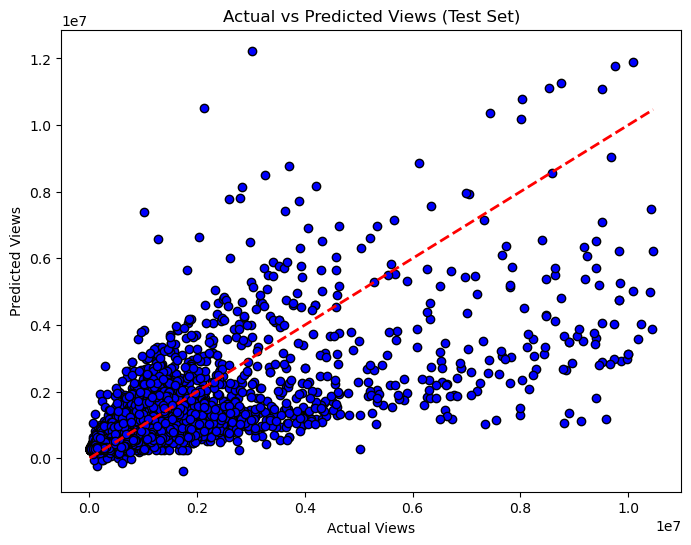

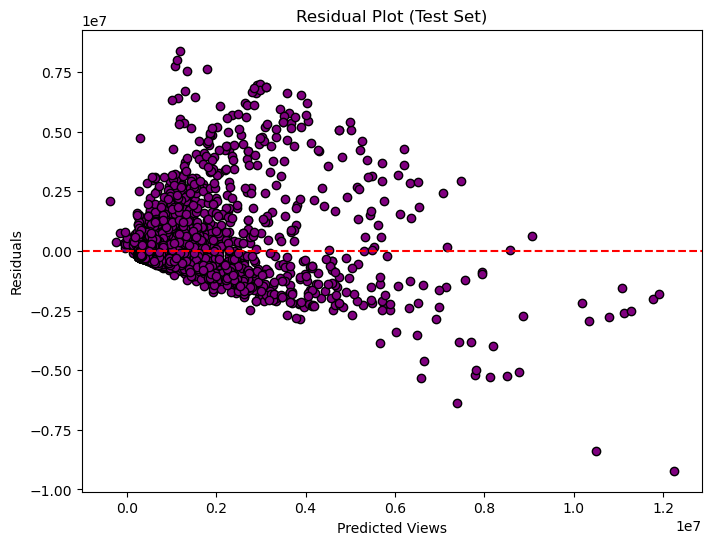

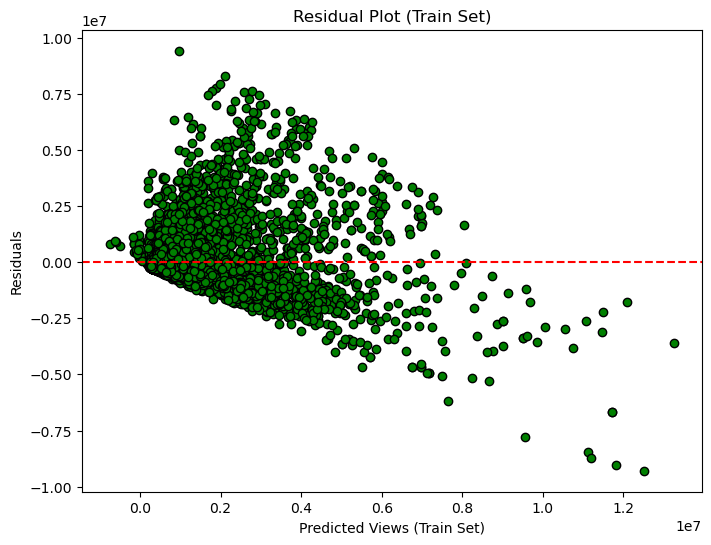

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Define features and target variable
X = df2[['likes', 'dislikes', 'comment_count']]
y = df2['views']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 5: Model evaluation on training set
print("Training Set Evaluation:")
print('Training R² Score:', r2_score(y_train, y_train_pred))
print('Training Mean Squared Error:', mean_squared_error(y_train, y_train_pred))

# Step 6: Model evaluation on test set
print("\nTest Set Evaluation:")
print('Test R² Score:', r2_score(y_test, y_test_pred))
print('Test Mean Squared Error:', mean_squared_error(y_test, y_test_pred))

# Step 7: Visualization - Actual vs Predicted for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted Views (Test Set)')
plt.show()

# Step 8: Visualization - Residual Plot for test set
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Views')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.show()

# Step 9: Optional: Visualization - Residual Plot for training set
train_residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, train_residuals, color='green', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Views (Train Set)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Train Set)')
plt.show()

# 2. Random Forest Regressor

Training Set Evaluation:
Training R² Score: 0.9506666812025025
Training Mean Squared Error: 68463437842.40973

Test Set Evaluation:
Test R² Score: 0.652854292829598
Test Mean Squared Error: 518482534334.31573


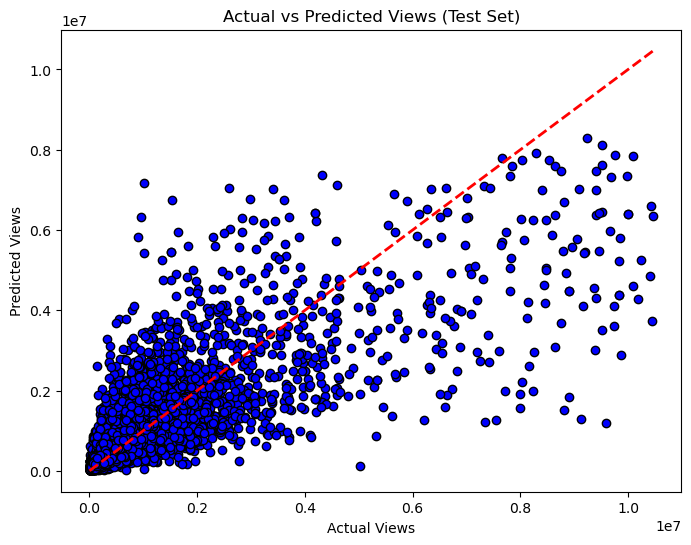

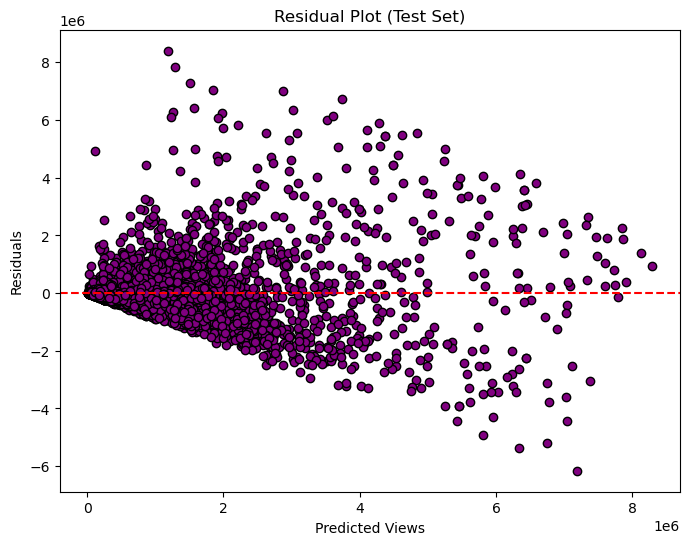

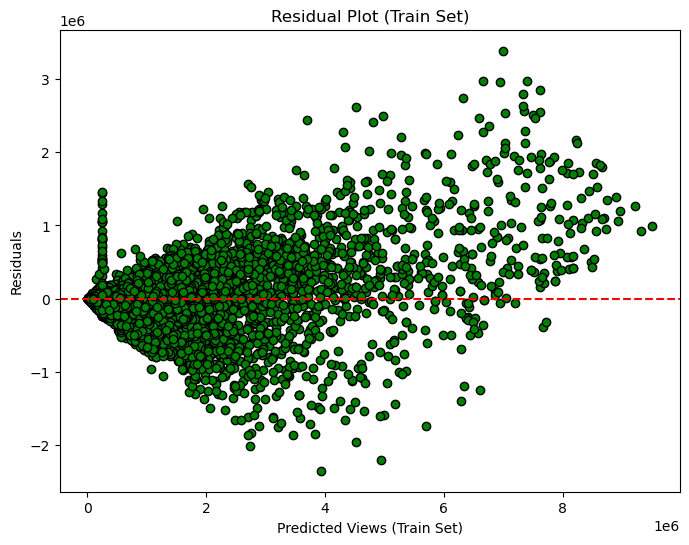

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Define features and target variable
X = df2[['likes', 'dislikes', 'comment_count']]
y = df2['views']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predictions on both training and test sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Step 5: Evaluate the model on training set
print("Training Set Evaluation:")
print('Training R² Score:', r2_score(y_train, y_train_pred_rf))
print('Training Mean Squared Error:', mean_squared_error(y_train, y_train_pred_rf))

# Step 6: Evaluate the model on test set
print("\nTest Set Evaluation:")
print('Test R² Score:', r2_score(y_test, y_test_pred_rf))
print('Test Mean Squared Error:', mean_squared_error(y_test, y_test_pred_rf))

# Step 7: Visualization - Actual vs Predicted for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_rf, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted Views (Test Set)')
plt.show()

# Step 8: Visualization - Residual Plot for test set
residuals = y_test - y_test_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_rf, residuals, color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Views')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.show()

# Step 9: Optional: Visualization - Residual Plot for training set
train_residuals = y_train - y_train_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred_rf, train_residuals, color='green', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Views (Train Set)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Train Set)')
plt.show()

# 3. Gradient Boosting Regressor

Training Set Evaluation:
Training R² Score: 0.6887540826072563
Training Mean Squared Error: 431938617521.1642

Test Set Evaluation:
Test R² Score: 0.6298802743367018
Test Mean Squared Error: 552795582388.7836


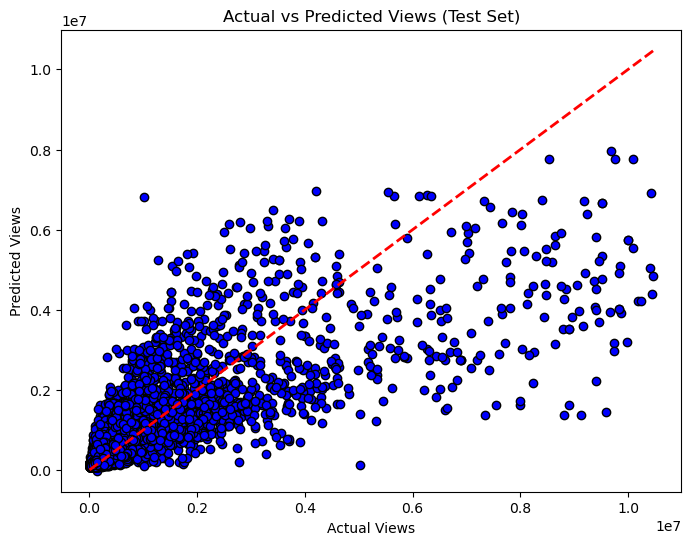

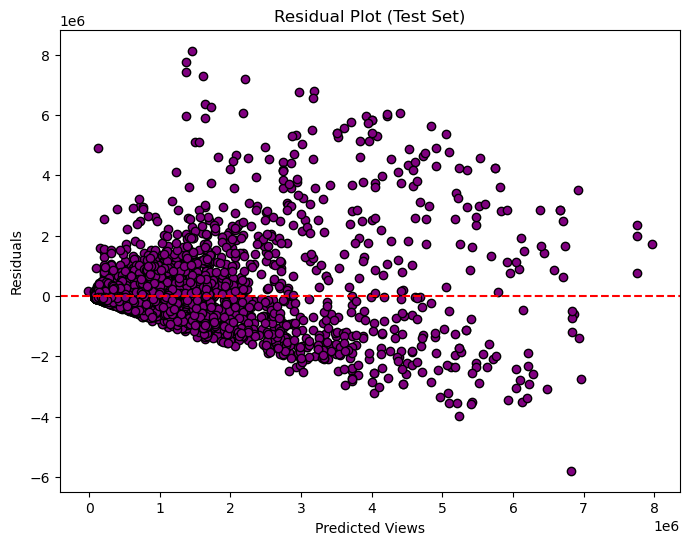

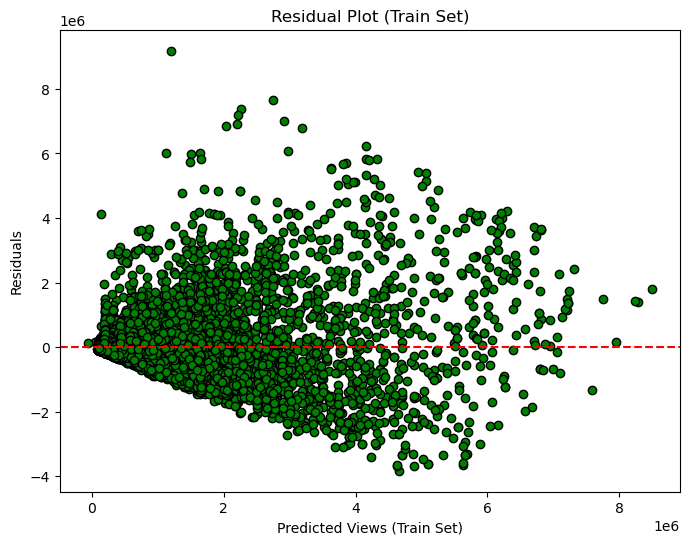

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Define features (X) and target (y)
X = df2[['likes', 'dislikes', 'comment_count']]  # Use df2 for features
y = df2['views']  # Use df2 for target (views)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Step 4: Predictions on both training and test sets
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Step 5: Evaluate the model on the training set
print("Training Set Evaluation:")
print('Training R² Score:', r2_score(y_train, y_train_pred_gb))
print('Training Mean Squared Error:', mean_squared_error(y_train, y_train_pred_gb))

# Step 6: Evaluate the model on the test set
print("\nTest Set Evaluation:")
print('Test R² Score:', r2_score(y_test, y_test_pred_gb))
print('Test Mean Squared Error:', mean_squared_error(y_test, y_test_pred_gb))

# Step 7: Visualization - Actual vs Predicted for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_gb, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted Views (Test Set)')
plt.show()

# Step 8: Visualization - Residual Plot for test set
residuals = y_test - y_test_pred_gb
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_gb, residuals, color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Views')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.show()

# Step 9: Optional: Visualization - Residual Plot for training set
train_residuals = y_train - y_train_pred_gb
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred_gb, train_residuals, color='green', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Views (Train Set)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Train Set)')
plt.show()

# 4. XGBoost

In [111]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 819.2 kB/s eta 0:02:33
   ---------------------------------------- 0.1/124.9 MB 853.3 kB/s eta 0:02:27
   ---------------------------------------- 0.2/124.9 MB 841.6 kB/s eta 0:02:29
   ---------------------------------------- 0.3/124.9 MB 923.9 kB/s eta 0:02:15
   ---------------------------------------- 0.3/124.9 MB 947.5 kB/s eta 0:02:12
   ---------------------------------------- 0.4/124.9 MB 969.8 kB/s eta 0:02:09
   ---------------------------------------- 0.4/124.9 MB 1.0 MB/s eta 0:02:04
   ---------------------------------------- 0.5/124.9 MB 972.0 kB/s eta 0:02:09
   ---------------------------------------- 0.5/124.9 MB 1.0 MB/s eta 0:02:04
   ---------------------------------------- 0.5/124.9

Training Set Evaluation:
Training R² Score: 0.8508575022404772
Training Mean Squared Error: 206975901356.5248

Test Set Evaluation:
Test R² Score: 0.6445295094715902
Test Mean Squared Error: 530916087980.78314


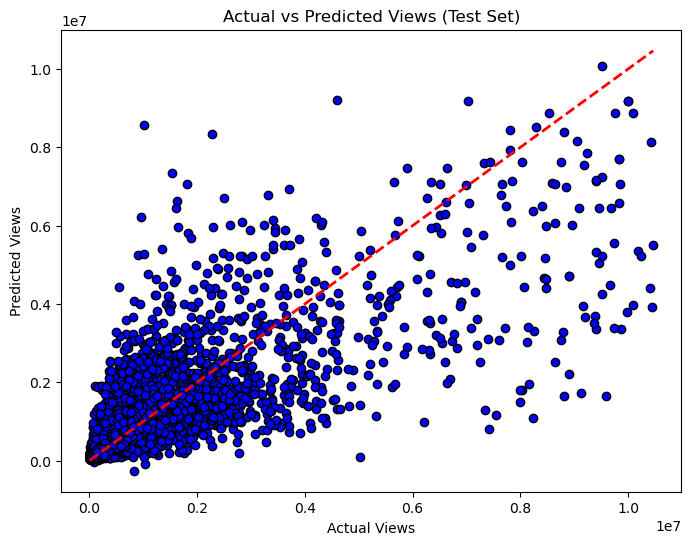

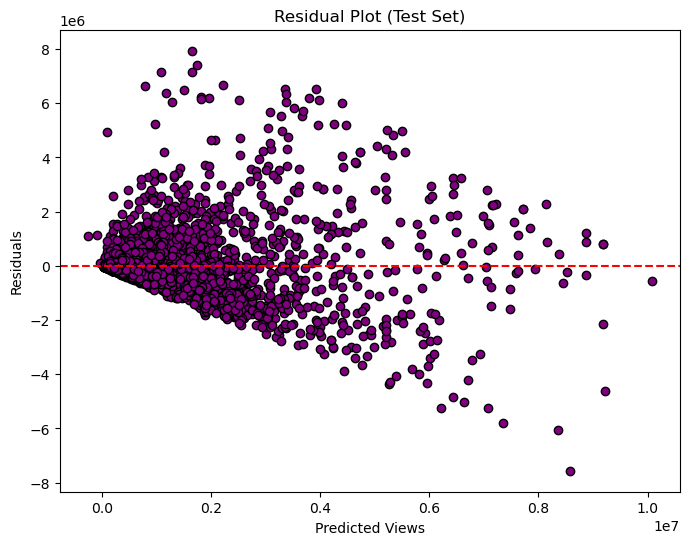

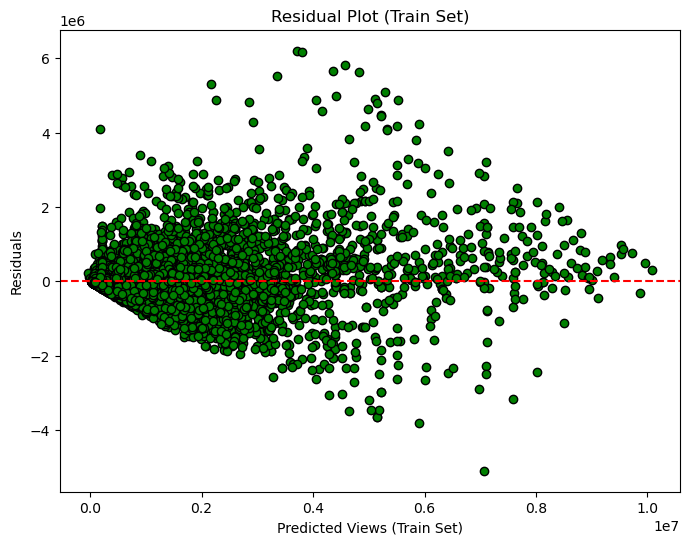

In [63]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Define features (X) and target (y) using df2
X = df2[['likes', 'dislikes', 'comment_count']]  # Use df2 for features
y = df2['views']  # Use df2 for target (views)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the XGBoost model
xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

# Predictions on both training and test sets
y_train_pred_xg = xg_model.predict(X_train)
y_test_pred_xg = xg_model.predict(X_test)

# Evaluate the model on the training set
print("Training Set Evaluation:")
print('Training R² Score:', r2_score(y_train, y_train_pred_xg))
print('Training Mean Squared Error:', mean_squared_error(y_train, y_train_pred_xg))

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print('Test R² Score:', r2_score(y_test, y_test_pred_xg))
print('Test Mean Squared Error:', mean_squared_error(y_test, y_test_pred_xg))

# Step 7: Visualization - Actual vs Predicted for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_xg, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted Views (Test Set)')
plt.show()

# Step 8: Visualization - Residual Plot for test set
residuals = y_test - y_test_pred_xg
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_xg, residuals, color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Views')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.show()

# Optional: Visualization - Residual Plot for training set
train_residuals = y_train - y_train_pred_xg
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred_xg, train_residuals, color='green', edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Views (Train Set)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Train Set)')
plt.show()

# Hasil Perbandingan

1. Linear Regression:<br>
Training R²: 0.5595<br>
Test R²: 0.5496<br>
Training MSE: 611,272,793,105.79<br>
Test MSE: 672,723,777,235.78<br>
2. Random Forest Regressor (RFR):<br>
Training R²: 0.9507<br>
Test R²: 0.6529<br>
Training MSE: 68,463,437,842.41<br>
Test MSE: 518,482,534,334.32<br>
3. Gradient Boosting Regressor (GBR):<br>
Training R²: 0.6888<br>
Test R²: 0.6299<br>
Training MSE: 431,938,617,521.16<br>
Test MSE: 552,795,582,388.78<br>
4. XGBoost:<br>
Training R²: 0.8509<br>
Test R²: 0.6445<br>
Training MSE: 206,975,901,356.52<br>
Test MSE: 530,916,087,980.78<br>

Dilihat dari perbandingan keempat model tersebut, selain memerhatikan nilai R² dan MSE, juga perlu memerhatikan perbandingan antara nilai training dan test untuk mengecek apakah adanya overfitting. <br>
Bisa dilihat bahwa:
1. Linear Regression bukan model terbaik karena performa prediktif yang rendah (hanya 55%) serta underfitting
2. RFR memiliki nilai Training R² yang tinggi (95%) namun Test R² yang cukup jauh (65%) sehingga meski model ini adalah model terbaik untuk Training Set, model ini tidak bisa memberikan generalisasi yang baik.
3. GBR memiliki nilai Training R² sebesar 68% dan test R² sebesar 63% yang menunjukkan meski untuk Training Set, modelnya tidak seakurat RFR, namun model ini lebih balanced karena jarak antara Training R² dan Test R² yang lebih kecil.
4. XGBoost memiliki nilai Training R² sebesar 85% yang tertinggi kedua setelah RFR namun nilai test R² nya juga mengalami drop dibandingkan nilai training yakni sebesar 64%. Hal ini menunjukkan meski XGBoost punya performa modeling yang cukup baik tapi juga mempunyai masalah overfitting.

Dari observasi ini bisa disimpulkan model GBR memiliki kemampuan generalisasi yang paling baik dibandingkan model lain, setelah itu XGBoost juga memiliki model yang cukup baik meskipun juga mempunyai masalah overfitting namun tidak seburuk RFR. 
Oleh karena itu, dipilih RFR, GBR dan XGBoost untuk dilakukan Hyperparameter Tuning untuk dilakukan optimasi model.

# Hyperparameter Tuning

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y) using df2
X = df2[['likes', 'dislikes', 'comment_count']]  # Features from df2
y = df2['views']  # Target variable (views)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]        # Method for sampling data (bootstrap)
}

# Create a RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best R^2 Score for Random Forest:", grid_search_rf.best_score_)

# Use the best model to make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the best model
r2 = r2_score(y_test, y_pred_rf_best)
mse = mean_squared_error(y_test, y_pred_rf_best)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('Tuned Random Forest R² Score:', r2)
print('Tuned Random Forest MSE:', mse)
print('Tuned Random Forest RMSE:', rmse)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R^2 Score for Random Forest: 0.6341579100259694
Tuned Random Forest R² Score: 0.6552087812643648
Tuned Random Forest MSE: 514965967355.3684
Tuned Random Forest RMSE: 717611.2926615414


In [74]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define features (X) and target (y) using df2
X = df2[['likes', 'dislikes', 'comment_count']]  # Features from df2
y = df2['views']  # Target variable (views)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for XGBoost
param_grid_xg = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 6, 9],               # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0]   # Subsample ratio of columns when constructing each tree
}

# Create an XGBoost model
xg = xgb.XGBRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_xg = GridSearchCV(estimator=xg, param_grid=param_grid_xg, cv=3, n_jobs=-1, verbose=2, scoring='r2')
grid_search_xg.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters for XGBoost:", grid_search_xg.best_params_)
print("Best R^2 Score for XGBoost:", grid_search_xg.best_score_)

# Use the best model to make predictions
best_xg_model = grid_search_xg.best_estimator_
y_pred_xg_best = best_xg_model.predict(X_test)

r2 = r2_score(y_test, y_pred_xg_best)
mse = mean_squared_error(y_test, y_pred_xg_best)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('Tuned XGBoost R² Score:', r2)
print('Tuned XGBoost MSE:', mse)
print('Tuned  XGBoost:', rmse)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}
Best R^2 Score for XGBoost: 0.6330148926845973
Tuned XGBoost R² Score: 0.6462455064663071
Tuned XGBoost MSE: 528353145526.4949
Tuned  XGBoost: 726879.0446329395


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define features (X) and target (y) using df2
X = df2[['likes', 'dislikes', 'comment_count']]  # Features from df2
y = df2['views']  # Target variable (views)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'max_depth': [3, 5, 7],                    # Maximum depth of the individual trees
    'subsample': [0.8, 0.9, 1.0],              # Fraction of samples used for fitting the individual trees
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best R² Score from GridSearchCV:", grid_search.best_score_)

# Use the best model to make predictions on the test set
best_gb_model = grid_search.best_estimator_
y_test_pred_gb_best = best_gb_model.predict(X_test)

# Evaluate the best model on the test set
print("\nTest Set Evaluation (After Tuning):")
print('Tuned Test R² Score:', r2_score(y_test, y_test_pred_gb_best))
print('Tuned Test Mean Squared Error:', mean_squared_error(y_test, y_test_pred_gb_best))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best R² Score from GridSearchCV: 0.6406620394515832

Test Set Evaluation (After Tuning):
Tuned Test R² Score: 0.6468843333900036
Tuned Test Mean Squared Error: 527399019937.27496


1. Random Forest Regressor<br>
Tuned Random Forest R² Score: 0.6552087812643648<br>
Tuned Random Forest MSE: 514965967355.368<br>
2. XgBoost:<br>
Tuned XGBoost R² Score: 0.6462455064663071<br>
Tuned XGBoost MSE: 528353145526.494<br>
3. Gradient Boosting Regressor<br>
Tuned Test R² Score: 0.6468843333900036<br>
Tuned Test Mean Squared Error: 527399019937.2749<br>

Model Terbaik: Berdasarkan hasilnya, Random Forest yang sudah di-tuning memiliki kinerja keseluruhan terbaik, dengan skor R² tertinggi dan MSE terendah. Model ini menjelaskan lebih banyak variasi dalam data dan menghasilkan kesalahan yang lebih kecil dibandingkan dengan model lainnya.

Pesaing Dekat: XGBoost dan GBR memiliki kinerja yang serupa, tetapi Random Forest sedikit mengungguli keduanya dalam kedua metrik tersebut. Jika efisiensi komputasi menjadi pertimbangan, Gradient Boosting atau XGBoost mungkin lebih disukai karena kekuatannya dalam kasus penggunaan tertentu seperti dataset yang besar.694